In [31]:
from music21 import *
import pandas as pd
import numpy as np

### Features
- chord_names (nominal)
        - Label encoding (C major -> 0, A major -> 13)
        - One-hot encoding?
        - Feature hashing
- roman_numerals

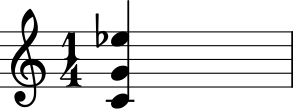

In [8]:
myChord = chord.Chord(["E-5","C4","G4"])
myChord.show()

In [9]:
myChord

<music21.chord.Chord E-5 C4 G4>

In [10]:
pitches = myChord.pitches
pitches

(<music21.pitch.Pitch E-5>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>)

In [11]:
melody = pitches[-1]
melody

<music21.pitch.Pitch G4>

In [21]:
myChord.sortAscending(inPlace = True)

<music21.chord.Chord C4 G4 E-5>

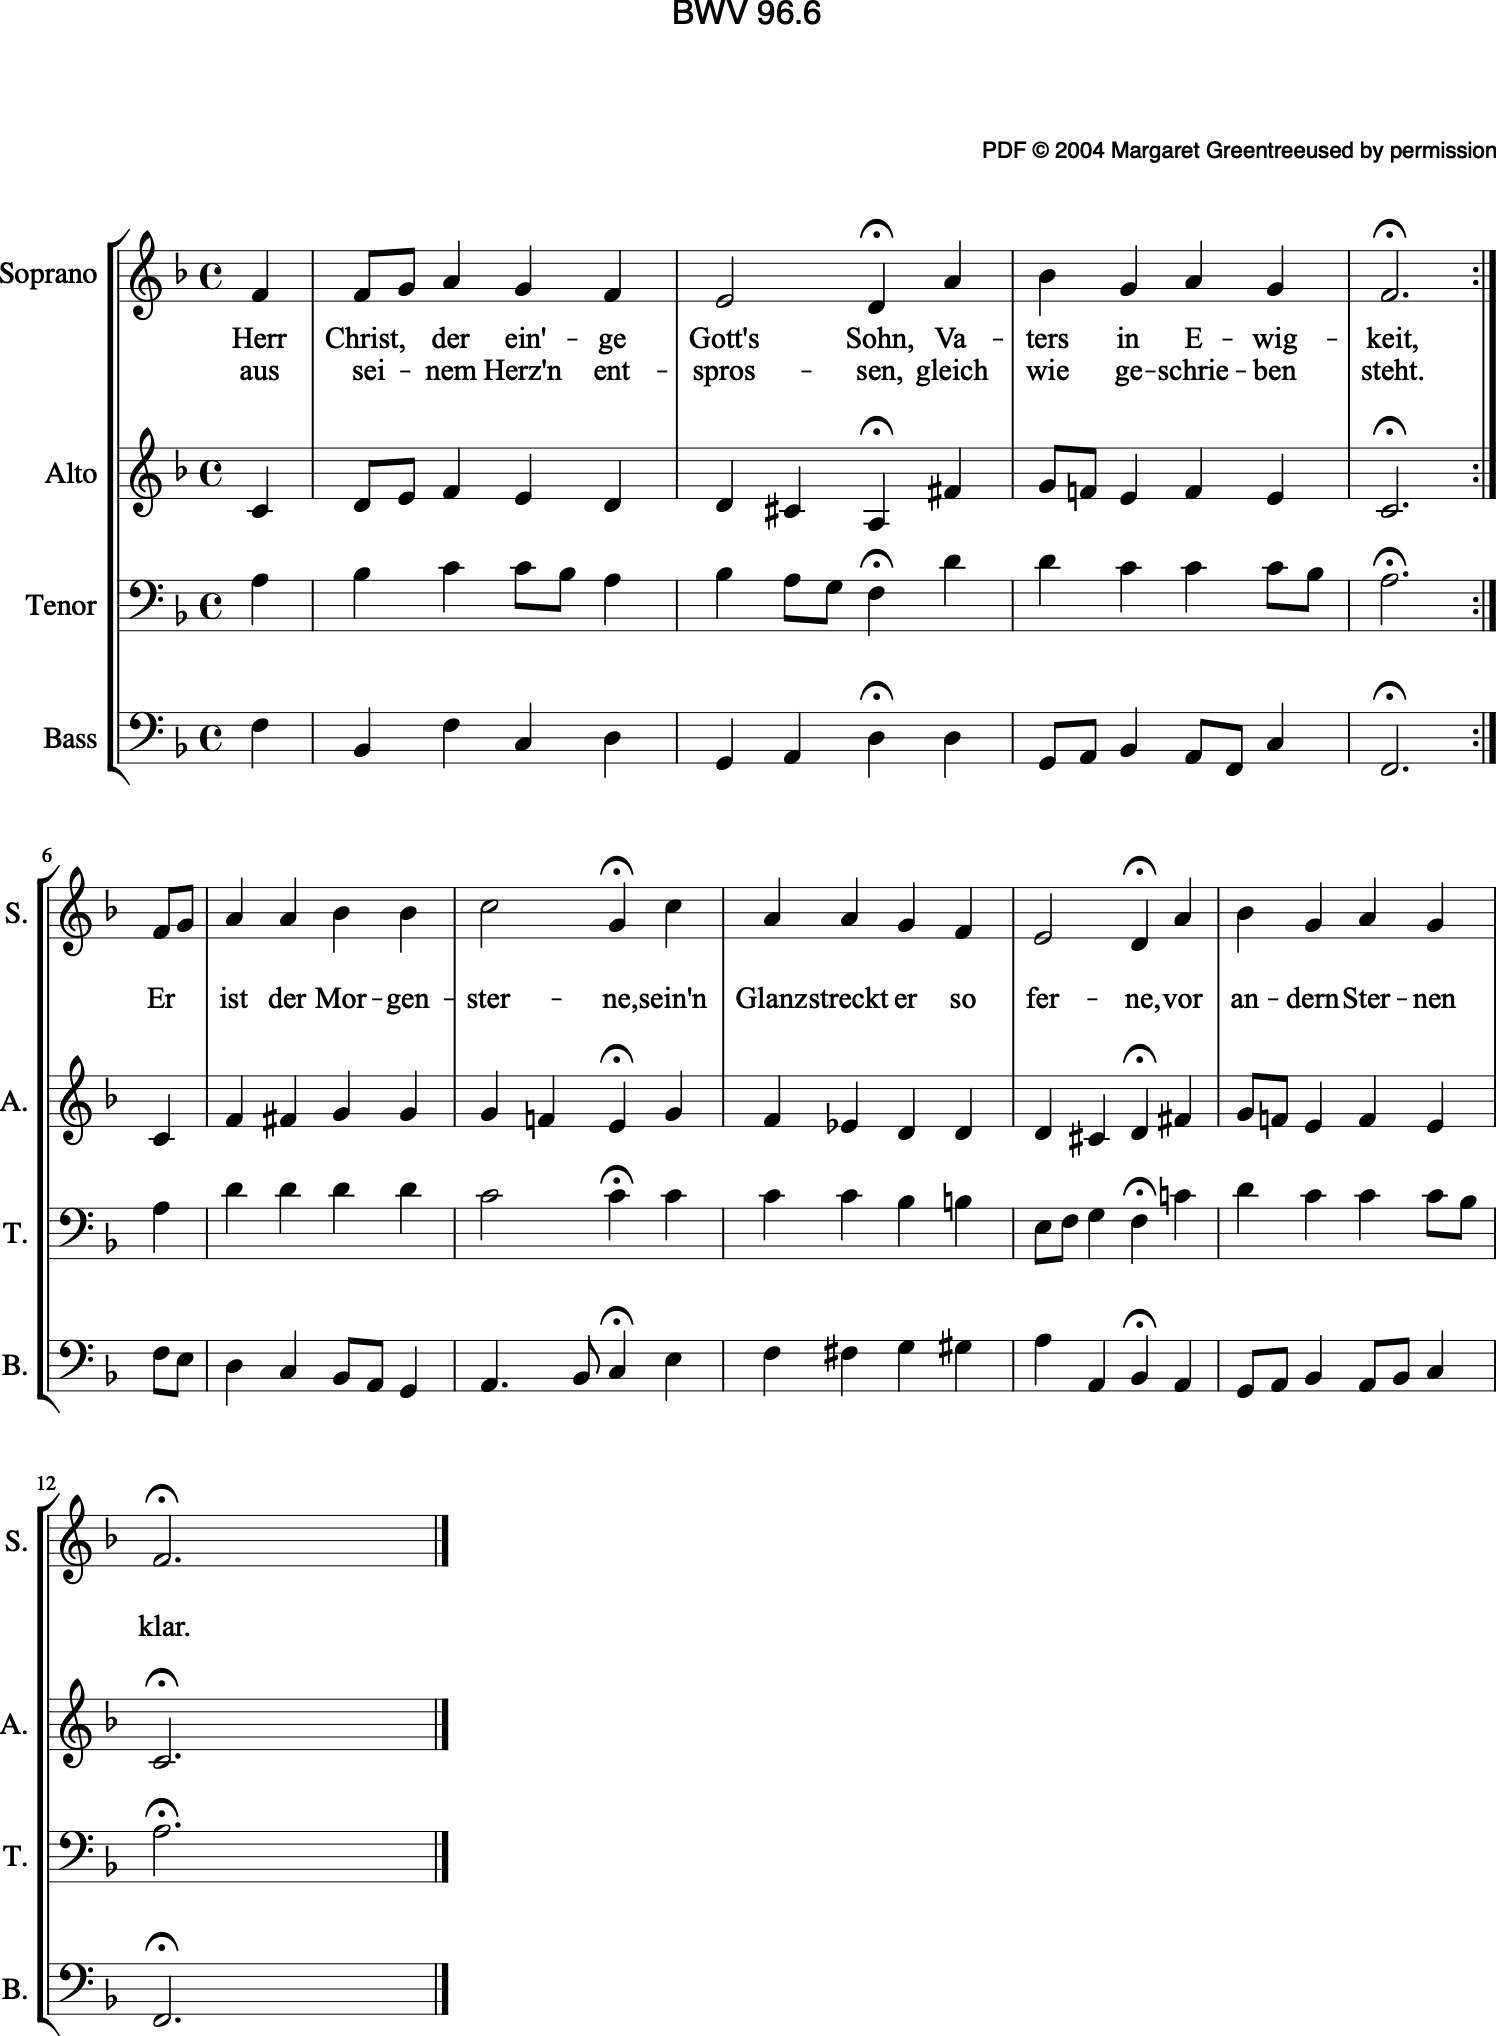

In [84]:
bachCorpus = corpus.search('bach', 'composer')
bachCorpus[-23].parse().show()

In [70]:
#Load corpus of Bach chorales
bachCorpus = corpus.search('bach', 'composer')


for chorale in bachCorpus:
    chorale = chorale.parse()
    print('Processing chorale: {}'.format(chorale.metadata.title))
    sopranoPart = chorale.getElementsByClass('Part')[0]
    
    for keychange in sopranoPart.recurse().getElementsByClass(key.Key):
        #Get key information and offset location
        print(keychange, keychange.offset)


Processing chorale: bwv10.7.mxl
g minor 0.0
Processing chorale: bwv101.7.mxl
d minor 0.0
Processing chorale: bwv102.7.mxl
g minor 0.0
Processing chorale: bwv103.6.mxl
b minor 0.0
Processing chorale: bwv104.6.mxl
A major 0.0
Processing chorale: bwv108.6.mxl
b minor 0.0
Processing chorale: bwv11.6.mxl
D major 0.0
Processing chorale: bwv110.7.mxl
b minor 0.0
Processing chorale: bwv112.5-sc.mxl
G major 0.0
Processing chorale: bwv113.8.mxl
b minor 0.0
Processing chorale: bwv114.7.mxl
g minor 0.0
Processing chorale: bwv115.6.mxl
G major 0.0
Processing chorale: bwv117.4.mxl
G major 0.0
Processing chorale: bwv121.6.mxl
b minor 0.0
Processing chorale: bwv122.6.mxl
g minor 0.0
Processing chorale: bwv123.6.mxl
b minor 0.0
Processing chorale: bwv126.6.mxl
a minor 0.0
Processing chorale: bwv127.5.mxl
F major 0.0
Processing chorale: bwv13.6.mxl
B- major 0.0
Processing chorale: bwv133.6.mxl
D major 0.0
Processing chorale: bwv136.6.mxl
b minor 0.0
Processing chorale: bwv14.5.mxl
g minor 0.0
Processing

Processing chorale: bwv337.mxl
a minor 0.0
Processing chorale: bwv338.mxl
a minor 0.0
Processing chorale: bwv339.mxl
A major 0.0
Processing chorale: bwv340.mxl
C major 0.0
Processing chorale: bwv341.mxl
d minor 0.0
Processing chorale: bwv342.mxl
a minor 0.0
Processing chorale: bwv343.mxl
d minor 0.0
Processing chorale: bwv344.mxl
d minor 0.0
Processing chorale: bwv345.mxl
g minor 0.0
Processing chorale: bwv346.mxl
C major 0.0
Processing chorale: bwv347.mxl
A major 0.0
Processing chorale: bwv348.mxl
B- major 0.0
Processing chorale: bwv349.mxl
F major 0.0
Processing chorale: bwv350.mxl
g minor 0.0
Processing chorale: bwv351.mxl
d minor 0.0
Processing chorale: bwv352.mxl
a minor 0.0
Processing chorale: bwv353.mxl
g minor 0.0
Processing chorale: bwv354.mxl
f minor 0.0
Processing chorale: bwv355.mxl
A major 0.0
Processing chorale: bwv356.mxl
g minor 0.0
Processing chorale: bwv357.mxl
g minor 0.0
Processing chorale: bwv358.mxl
d minor 0.0
Processing chorale: bwv359.mxl
A major 0.0
Processing

In [62]:
#Iterate through soprano part and print all key changes
print('Key Changes:')
for keychange in soprano.recurse().getElementsByClass(key.Key):
    #Get key information and offset location
    print(keychange, keychange.offset)

Key Changes:
g minor 0.0


In [38]:
bachFeatures = pd.DataFrame(np.zeros((len(bach),2)), columns = ['roman_numerals', 'mel_notes'], dtype='object')
bachFeatures

roman_numerals mel_notes
0                0         0
1                0         0
2                0         0
3                0         0
4                0         0
..             ...       ...
357              0         0
358              0         0
359              0         0
360              0         0
361              0         0

[362 rows x 2 columns]

In [39]:
bachFeatures.dtypes

roman_numerals    object
mel_notes         object
dtype: object

In [41]:
k = key.Key('f#')  # 3-sharps minor
rn = roman.RomanNumeral('V', k)
rn.key

<music21.key.Key of f# minor>

In [42]:
rn.pitchedCommonName

'C#-major triad'